<h2 align="center">Case Study of Hotels Data Analysis Project<h2>

***
### ==> 1. Data Import and Data Exploration
***

***
**Part1- Data Exploration**
***

In [3]:
import pandas as pd

In [55]:
df_bookings=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [5]:
df_bookings.shape

(134590, 12)

In [6]:
df_bookings.size

1615080

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

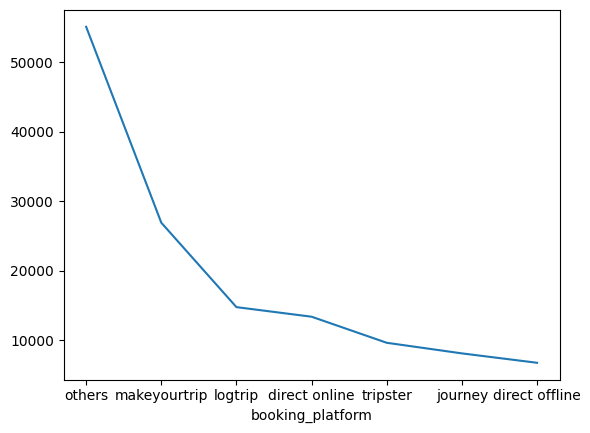

In [10]:
df_bookings.booking_platform.value_counts().plot()

<Axes: xlabel='booking_platform'>

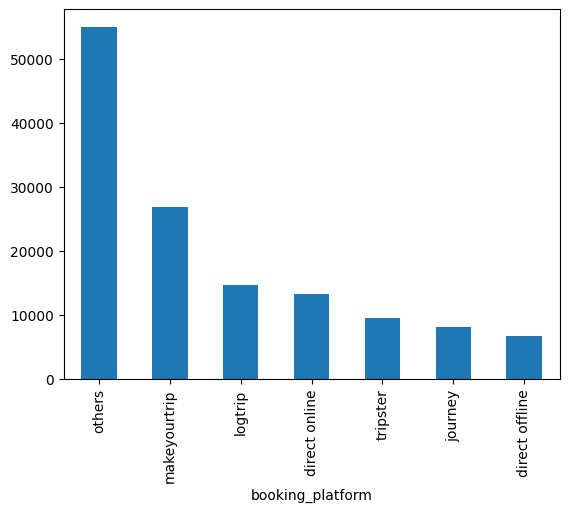

In [11]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

<Axes: ylabel='booking_platform'>

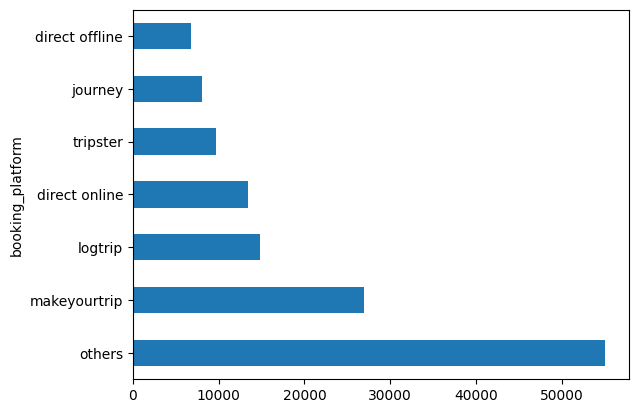

In [12]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [13]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [14]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [16]:
df_date=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
df_hotels=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
df_Rooms=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
df_agg_bookings=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")

In [54]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [18]:
df_hotels.shape

(25, 4)

In [19]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

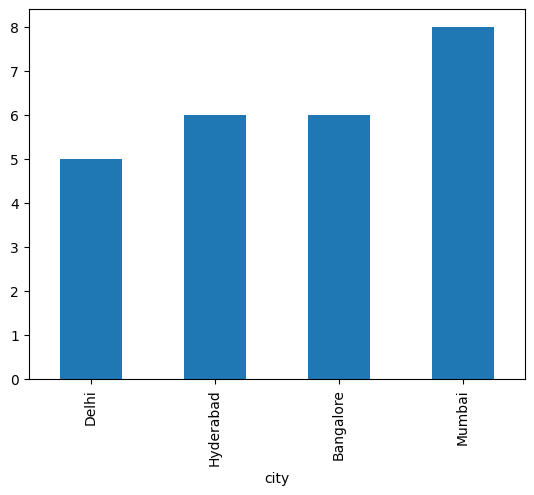

In [20]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

***
 **Exercise: Explore aggregate bookings**
***

In [21]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [22]:
df_agg_bookings.property_id.unique()	

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [23]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum().sort_values()

property_id
16558    3153
17562    3424
17564    3982
19558    4400
16561    4418
18558    4475
16560    4693
19559    4729
18563    4737
16562    4820
17558    5053
17561    5183
18559    5256
19563    5413
19561    5736
19562    5812
17560    6013
19560    6079
17559    6142
17563    6337
18561    6458
18560    6638
16563    7211
18562    7333
16559    7338
Name: successful_bookings, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [24]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Exercise-4. Find out properties that have highest capacity**

In [25]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [26]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
**Data Cleaning(DC)**
***

**Part-2--Data Cleaning**

In [41]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [42]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [43]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [44]:
df_bookings.shape

(134573, 12)

In [45]:
df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [47]:
df_bookings.shape

(134573, 12)

In [48]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(45220))

In [49]:
avg, std=df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [50]:
higher_Limit=avg+3*std
higher_Limit

np.float64(34273.98826948176)

In [51]:
Lower_Limit=avg-3*std
Lower_Limit

np.float64(-4442.068716525369)

In [36]:
df_bookings[df_bookings.revenue_generated>higher_Limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [37]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_Limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [38]:
df_bookings.shape

(134573, 12)

In [83]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [85]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [87]:
higher_Limit=df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
higher_Limit

np.float64(33479.358661845814)

In [88]:
df_bookings[df_bookings.revenue_realized>higher_Limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [90]:
df_Rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [93]:
df_bookings[df_bookings.room_category=="RT4"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
47,May012216558RT41,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT4,logtrip,NaN,Cancelled,26600,10640
48,May012216558RT42,16558,27-04-22,1/5/2022,2/5/2022,1.0,RT4,tripster,NaN,Checked Out,26600,26600
49,May012216558RT43,16558,29-04-22,1/5/2022,4/5/2022,2.0,RT4,direct offline,NaN,Cancelled,26600,10640
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
138,May012216559RT42,16559,11/4/2022,1/5/2022,3/5/2022,2.0,RT4,direct offline,NaN,Cancelled,32300,12920
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [94]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [95]:
23439+3*9048

50583

In [96]:
df_bookings.isnull()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,False,False,False,False,False,False,False,False,False,False,False,False
134585,False,False,False,False,False,False,False,False,False,False,False,False
134587,False,False,False,False,False,False,False,False,True,False,False,False
134588,False,False,False,False,False,False,False,False,False,False,False,False


In [97]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [140]:
# write your code here
df_agg_bookings=pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [141]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [142]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [143]:
df_agg_bookings.capacity.median()

np.float64(25.0)

In [144]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

C:\Users\91807\AppData\Local\Temp\ipykernel_23688\625765049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


In [56]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
15,17563,1-May-22,RT1,21,25.0


**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [57]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [58]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [59]:
df_agg_bookings.shape

(9200, 5)

In [147]:
df_agg_bookings 

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [60]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9192, 5)

***
### ==> 3. Data Transformation
***

In [61]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [62]:
df_agg_bookings["OCC_PCT"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head(2)

C:\Users\91807\AppData\Local\Temp\ipykernel_16420\2182372087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["OCC_PCT"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]


,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333


In [63]:
df_agg_bookings["OCC_PCT"]=round(df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"],2)
df_agg_bookings.head(2)

C:\Users\91807\AppData\Local\Temp\ipykernel_16420\2814154608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["OCC_PCT"]=round(df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"],2)


,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT
0,16559,1-May-22,RT1,25,30.0,0.83
1,19562,1-May-22,RT1,28,30.0,0.93


In [64]:
df_agg_bookings["OCC_PCT"]=df_agg_bookings["OCC_PCT"].apply(lambda x:round(x*100,2))
df_agg_bookings.head(2)

C:\Users\91807\AppData\Local\Temp\ipykernel_16420\1440785761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["OCC_PCT"]=df_agg_bookings["OCC_PCT"].apply(lambda x:round(x*100,2))


,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT
0,16559,1-May-22,RT1,25,30.0,83.0
1,19562,1-May-22,RT1,28,30.0,93.0


***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [65]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT
0,16559,1-May-22,RT1,25,30.0,83.0
1,19562,1-May-22,RT1,28,30.0,93.0
2,19563,1-May-22,RT1,23,30.0,77.0
4,16558,1-May-22,RT1,18,19.0,95.0
5,17560,1-May-22,RT1,28,40.0,70.0


In [66]:
df_agg_bookings.groupby("room_category")["OCC_PCT"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.01
RT4    59.28
Name: OCC_PCT, dtype: float64

In [67]:
df_agg_bookings_Rooms=pd.merge(df_agg_bookings,df_Rooms, left_on="room_category",right_on="room_id")
df_agg_bookings_Rooms

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.0,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.0,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,77.0,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,95.0,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.0,RT1,Standard
...,...,...,...,...,...,...,...,...
9187,16563,31-Jul-22,RT4,13,18.0,72.0,RT4,Presidential
9188,16559,31-Jul-22,RT4,13,18.0,72.0,RT4,Presidential
9189,17558,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential
9190,19563,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential


In [69]:
df_agg_bookings_Rooms.groupby("room_class")["OCC_PCT"].mean().round(2)

room_class
Elite           58.01
Premium         58.01
Presidential    59.28
Standard        57.89
Name: OCC_PCT, dtype: float64

In [70]:
df_agg_bookings_Rooms.drop("room_id",axis=1,inplace=True)
df_agg_bookings_Rooms.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class
0,16559,1-May-22,RT1,25,30.0,83.0,Standard
1,19562,1-May-22,RT1,28,30.0,93.0,Standard
2,19563,1-May-22,RT1,23,30.0,77.0,Standard
3,16558,1-May-22,RT1,18,19.0,95.0,Standard


<Axes: xlabel='room_class'>

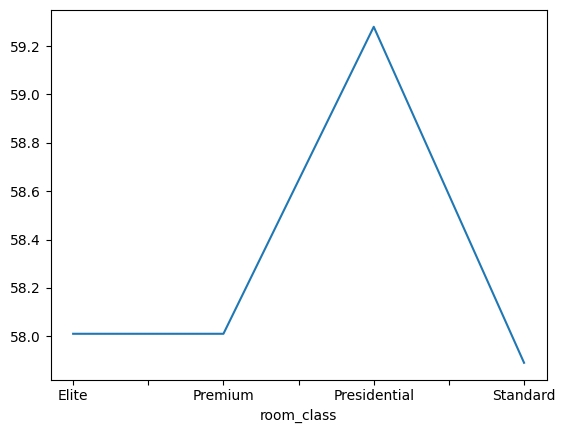

In [74]:
df_agg_bookings_Rooms.groupby("room_class")["OCC_PCT"].mean().round(2).plot()

**2. Print average occupancy rate per city**

In [81]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [82]:
df_merge_City_Occ=pd.merge(df_agg_bookings_Rooms,df_hotels,on="property_id")
df_merge_City_Occ.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.0,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.0,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,77.0,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,95.0,Standard,Atliq Grands,Luxury,Delhi


In [83]:
df_merge_City_Occ.groupby("city")["OCC_PCT"].mean().round(2)

city
Bangalore    56.33
Delhi        61.53
Hyderabad    58.12
Mumbai       57.89
Name: OCC_PCT, dtype: float64

<Axes: xlabel='city'>

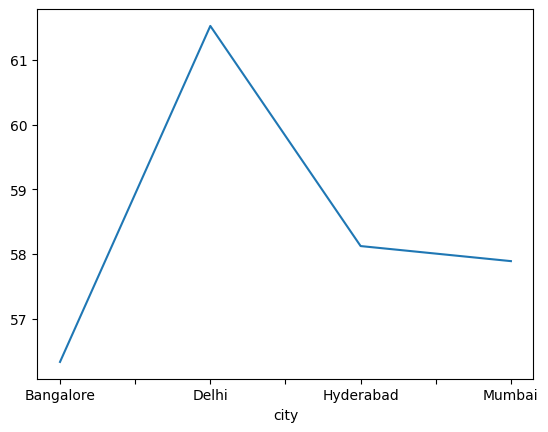

In [84]:
df_merge_City_Occ.groupby("city")["OCC_PCT"].mean().plot()

**3. When was the occupancy better? Weekday or Weekend?**

In [85]:
df_merge_City_Occ.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.0,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.0,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,77.0,Standard,Atliq Palace,Business,Bangalore


In [86]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [88]:
df_booking_Date_Occ=pd.merge(df_merge_City_Occ,df_date,left_on="check_in_date",right_on="date")
df_booking_Date_Occ.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,52.0,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.0,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.0,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.0,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


In [89]:
df_booking_Date_Occ.groupby("day_type")["OCC_PCT"].mean().round(2)

day_type
weekeday    50.88
weekend     72.36
Name: OCC_PCT, dtype: float64

<Axes: xlabel='day_type'>

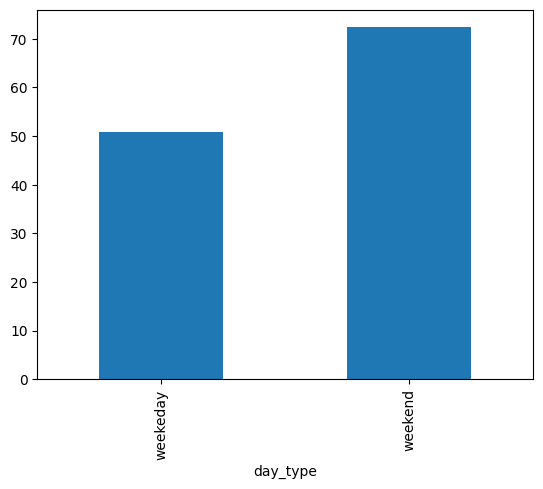

In [90]:
df_booking_Date_Occ.groupby("day_type")["OCC_PCT"].mean().round(2).plot(kind="bar")

**4: In the month of June, what is the occupancy for different cities**

In [93]:
df_booking_Date_Occ.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,52.0,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.0,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.0,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [94]:
df_Jun22_date=df_booking_Date_Occ[df_booking_Date_Occ["mmm yy"]=="Jun 22"]
df_Jun22_date.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,67.0,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.0,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,57.0,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [99]:
df_Jun22_date.groupby("city")["OCC_PCT"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.49
Hyderabad    58.47
Mumbai       58.39
Bangalore    56.44
Name: OCC_PCT, dtype: float64

<Axes: xlabel='city'>

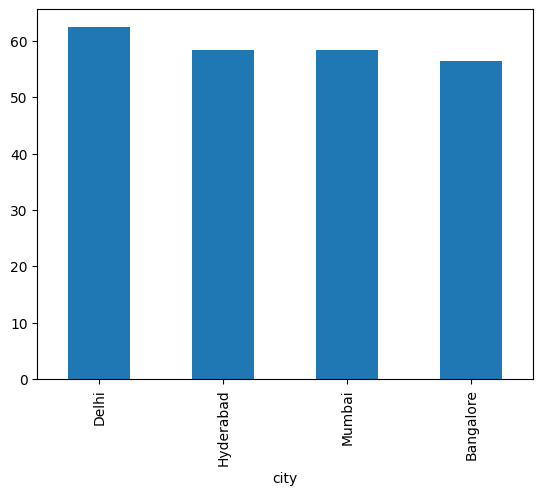

In [101]:
df_Jun22_date.groupby("city")["OCC_PCT"].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [102]:
df_august = pd.read_csv(r"C:\Users\91807\Downloads\Python For Data Analyst\source-code\source-code\3_project_hospitality_analysis\datasets\new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [103]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [104]:
df_booking_Date_Occ.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'OCC_PCT', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [105]:
df_august.shape

(7, 13)

In [106]:
df_booking_Date_Occ.shape

(6497, 14)

In [110]:
latest_df=pd.concat([df_booking_Date_Occ,df_august],ignore_index=True,axis=0)
latest_df.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC_PCT,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [111]:
latest_df.shape

(6504, 15)

**6. Print revenue realized per city**

In [112]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [113]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [154]:
df_bookings_all= pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [115]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

<Axes: xlabel='city'>

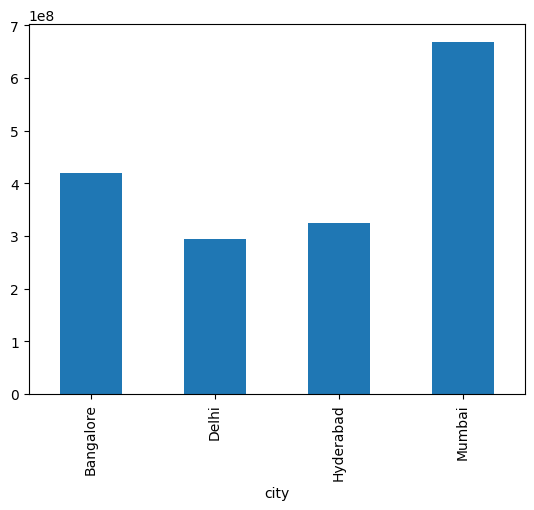

In [117]:
df_bookings_all.groupby("city")["revenue_realized"].sum().plot(kind="bar")

**Print revenue realized per hotel type**

In [156]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [157]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [158]:
df_bookings_all= pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [159]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320312468
Atliq Grands     211532764
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

<Axes: xlabel='property_name'>

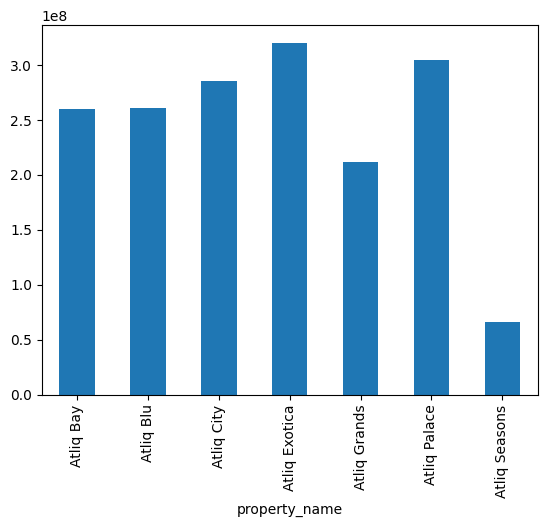

In [160]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().plot(kind="bar")

**Exercise-2 Print average rating per city**

In [163]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

<Axes: xlabel='city'>

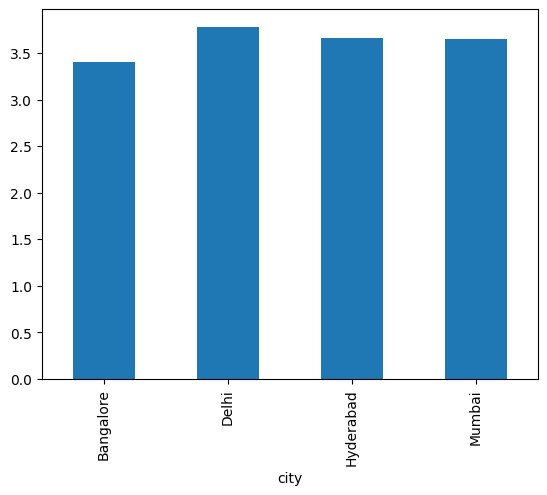

In [164]:
df_bookings_all.groupby("city")["ratings_given"].mean().plot(kind="bar")

** Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

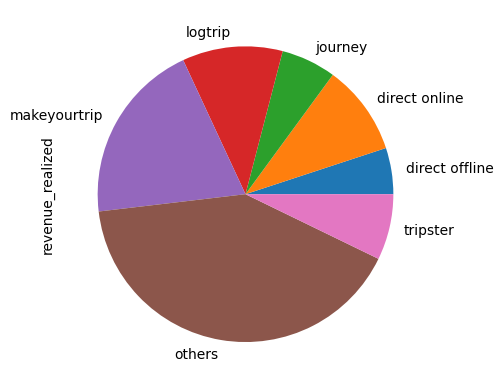

In [167]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")